In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline

In [69]:
df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\2255243340.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/goura/Desktop/Loan_Default_Classification/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [74]:
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'pymnt_plan', 
                   'next_pymnt_d', 'initial_list_status', 'policy_code', 'mths_since_last_record', 
                   'mths_since_last_delinq', 'mths_since_last_major_derog', 'last_fico_range_low', 
                   'last_fico_range_high', 'hardship_flag', 'hardship_type', 'hardship_reason', 
                   'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 
                   'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 
                   'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
                   'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 
                   'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
                   'settlement_amount', 'settlement_percentage', 'settlement_term']
df_cleaned = df.drop(columns=columns_to_drop)

In [75]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 113 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(96), object(17)
memory usage: 1.9+ GB


In [76]:
drop_null_column = ['funded_amnt_inv', 'total_bal_il', 'emp_title', 'issue_d', 'addr_state', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'sec_app_mths_since_last_major_derog',  'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'revol_bal_joint', 'mths_since_rcnt_il', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']
cleaned = df_cleaned.drop(columns=drop_null_column)

In [77]:
for el in cleaned:
    print(el, end=", ")

loan_amnt, funded_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, loan_status, purpose, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, total_pymnt, total_rec_prncp, total_rec_int, recoveries, collection_recovery_fee, collections_12_mths_ex_med, application_type, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, num_tl_op_past_12m, pct_tl_nvr_dlq, pub_rec_bankruptcies, tax_liens, 

In [78]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 40 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   funded_amnt                 float64
 2   term                        object 
 3   int_rate                    float64
 4   installment                 float64
 5   grade                       object 
 6   sub_grade                   object 
 7   emp_length                  object 
 8   home_ownership              object 
 9   annual_inc                  float64
 10  verification_status         object 
 11  loan_status                 object 
 12  purpose                     object 
 13  dti                         float64
 14  delinq_2yrs                 float64
 15  earliest_cr_line            object 
 16  fico_range_low              float64
 17  fico_range_high             float64
 18  inq_last_6mths              float64
 19  open_acc             

In [79]:
low_missing_columns = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
    'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 
    'fico_range_low', 'fico_range_high', 'revol_bal', 'out_prncp', 'total_pymnt', 
    'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'application_type', 'delinq_2yrs', 'open_acc', 'inq_last_6mths', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tax_liens'
]
df_cleaned = cleaned.dropna(subset=low_missing_columns)

In [80]:
df_cleaned.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                    146907
home_ownership                     0
annual_inc                         0
verification_status                0
loan_status                        0
purpose                            0
dti                             1711
delinq_2yrs                        0
earliest_cr_line                   0
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                      1770
total_acc                          0
out_prncp                          0
total_pymnt                        0
total_rec_prncp                    0
t

In [81]:
df_cleaned.head(10)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens
0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,...,0.0,Individual,0.0,722.0,144904.0,9300.0,3.0,76.9,0.0,0.0
1,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,...,0.0,Individual,0.0,0.0,204396.0,111800.0,2.0,97.4,0.0,0.0
2,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,...,0.0,Joint App,0.0,0.0,189699.0,14000.0,0.0,100.0,0.0,0.0
3,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,...,0.0,Individual,0.0,0.0,301500.0,67300.0,1.0,100.0,0.0,0.0
4,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,...,0.0,Individual,0.0,0.0,331730.0,34000.0,4.0,96.6,0.0,0.0
5,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,34000.0,...,0.0,Individual,0.0,0.0,12798.0,12900.0,0.0,100.0,0.0,0.0
6,20000.0,20000.0,36 months,9.17,637.58,B,B2,10+ years,MORTGAGE,180000.0,...,0.0,Individual,0.0,0.0,360358.0,94200.0,2.0,96.3,0.0,0.0
7,20000.0,20000.0,36 months,8.49,631.26,B,B1,10+ years,MORTGAGE,85000.0,...,0.0,Individual,0.0,0.0,141601.0,14500.0,0.0,93.3,0.0,0.0
8,10000.0,10000.0,36 months,6.49,306.45,A,A2,6 years,RENT,85000.0,...,0.0,Individual,0.0,8341.0,27957.0,30300.0,2.0,95.7,1.0,0.0
9,8000.0,8000.0,36 months,11.48,263.74,B,B5,10+ years,MORTGAGE,42000.0,...,0.0,Individual,0.0,0.0,199696.0,18000.0,2.0,94.4,0.0,0.0


In [82]:
df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
df_cleaned['pub_rec_bankruptcies'] = df_cleaned['pub_rec_bankruptcies'].fillna(df_cleaned['pub_rec_bankruptcies'].median())
df_cleaned['tot_coll_amt'] = df_cleaned['tot_coll_amt'].fillna(df_cleaned['tot_coll_amt'].median())
df_cleaned['tot_cur_bal'] = df_cleaned['tot_cur_bal'].fillna(df_cleaned['tot_cur_bal'].median())
df_cleaned['total_rev_hi_lim'] = df_cleaned['total_rev_hi_lim'].fillna(df_cleaned['total_rev_hi_lim'].median())
df_cleaned['num_tl_op_past_12m'] = df_cleaned['num_tl_op_past_12m'].fillna(df_cleaned['num_tl_op_past_12m'].median())
df_cleaned['pct_tl_nvr_dlq'] = df_cleaned['pct_tl_nvr_dlq'].fillna(df_cleaned['pct_tl_nvr_dlq'].median())
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode())


C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1049821122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dti'] = df_cleaned['dti'].fillna(df_cleaned['dti'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1049821122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revol_util'] = df_cleaned['revol_util'].fillna(df_cleaned['revol_util'].median())
C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1049821122.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [83]:
df_cleaned.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                    146907
home_ownership                     0
annual_inc                         0
verification_status                0
loan_status                        0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
out_prncp                          0
total_pymnt                        0
total_rec_prncp                    0
t

In [84]:
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0], inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\4248550444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0], inplace=True)
C:\Users\goura\AppData\Local\Temp\ipykernel_15468\4248550444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['emp_length'].fillna(df_cl

In [85]:
# Drop specific columns
df_numeric = df_cleaned.select_dtypes(include=[float, int])  # Select only numeric columns

<Axes: >

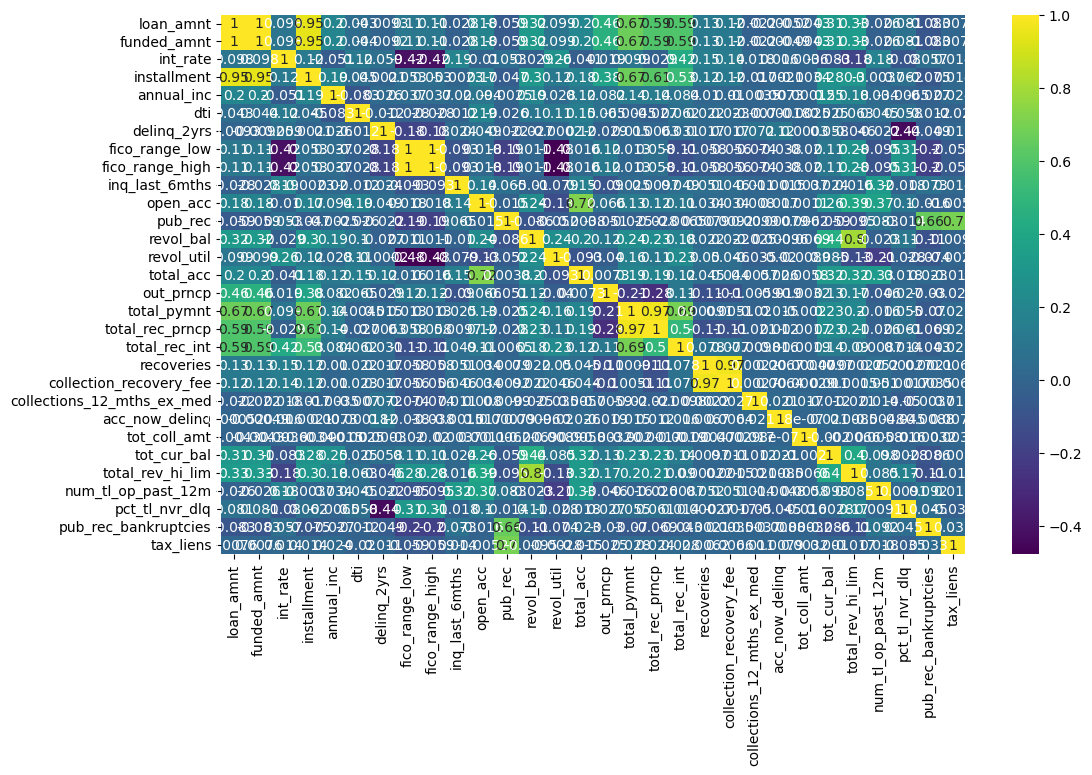

In [86]:
plt.figure(figsize=(12,7))
sns.heatmap(df_numeric.corr(),annot=True,cmap="viridis")

In [89]:
df_cleaned['fico_score'] = (df_cleaned['fico_range_low'] + df_cleaned['fico_range_high']) / 2

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\3298317165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['fico_score'] = (df_cleaned['fico_range_low'] + df_cleaned['fico_range_high']) / 2


In [92]:
df_numeric['fico_score'] = (df_numeric['fico_range_low'] + df_numeric['fico_range_high']) / 2

In [90]:
df_cleaned.drop(['funded_amnt', 'installment', 'fico_range_low', 'fico_range_high', 'total_rec_prncp', 'collection_recovery_fee'], axis=1, inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1097728640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['funded_amnt', 'installment', 'fico_range_low', 'fico_range_high', 'total_rec_prncp', 'collection_recovery_fee'], axis=1, inplace=True)


In [93]:
df_numeric.drop(['funded_amnt', 'installment', 'fico_range_low', 'fico_range_high', 'total_rec_prncp', 'collection_recovery_fee'], axis=1, inplace=True)

<Axes: >

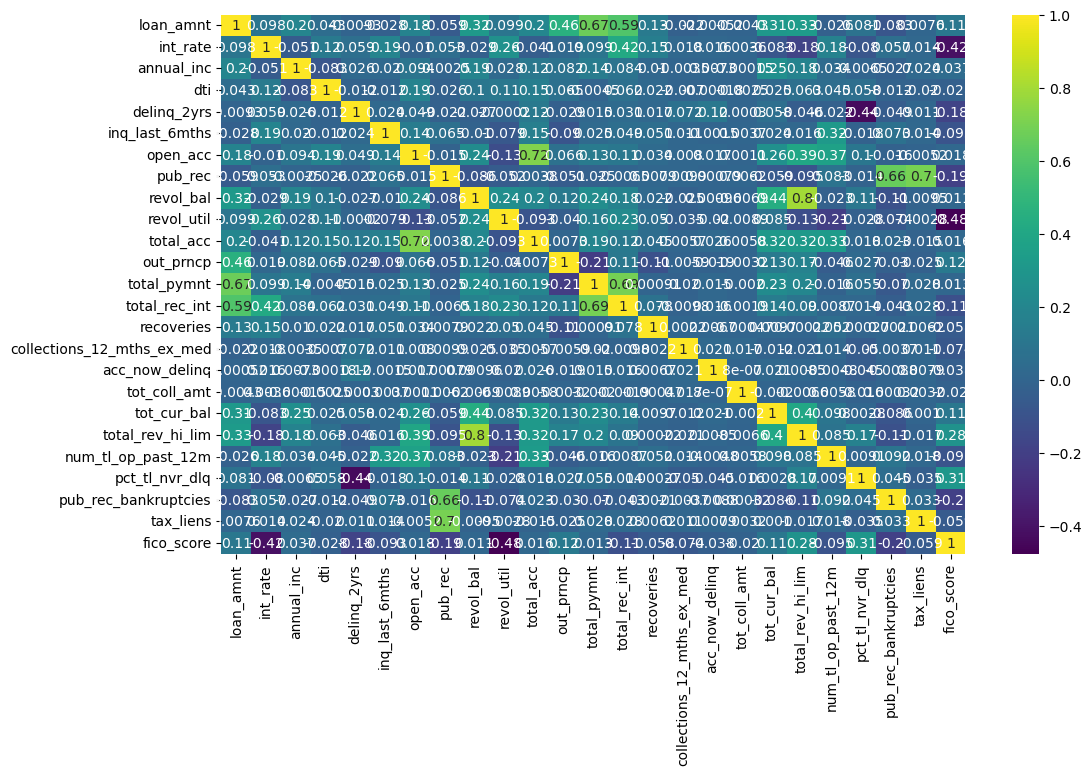

In [94]:
plt.figure(figsize=(12,7))
sns.heatmap(df_numeric.corr(),annot=True,cmap="viridis")

In [88]:
corr_matrix = df_numeric.corr().abs()

# Identify pairs with high correlation (above 0.8)
high_corr_pairs = np.where(corr_matrix > 0.8)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('loan_amnt', 'funded_amnt'), ('loan_amnt', 'installment'), ('funded_amnt', 'installment'), ('fico_range_low', 'fico_range_high'), ('total_pymnt', 'total_rec_prncp'), ('recoveries', 'collection_recovery_fee')]


In [95]:
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].median(), inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1118833201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['emp_length'] = df_cleaned['emp_length'].map(emp_length_mapping)
C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1118833201.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origi

In [96]:
home_ownership_mapping = {
    'MORTGAGE':0,
    'RENT':1,
    'OWN':2
}
df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\2972006397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['home_ownership'] = df_cleaned['home_ownership'].map(home_ownership_mapping)


In [97]:
verification_status_mapping = {
    'Not Verified':0,
    'Source Verified':1,
    'Verified':2
}
df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\49829525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['verification_status'] = df_cleaned['verification_status'].map(verification_status_mapping)


In [98]:
loan_status_mapping = {
    'Fully Paid': 0,
    'Current': 0,
    'Charged Off': 1,
    'In Grace Period': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1
}
df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\867387072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status'] = df_cleaned['loan_status'].map(loan_status_mapping)


In [99]:
application_type_mapping = {
    'Individual':0,
    'Joint App':1
}
df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\2094341301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['application_type'] = df_cleaned['application_type'].map(application_type_mapping)


In [100]:
df_cleaned['term'] = df_cleaned['term'].str.strip()
term_mapping = {
    '60 months':0,
    '36 months':1
}
df_cleaned['term'] = df_cleaned['term'].map(term_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1804118674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].str.strip()
C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1804118674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].map(term_mapping)


In [101]:
df_cleaned['term'].head()

0    1
1    1
2    0
3    0
4    0
Name: term, dtype: int64

In [102]:
df_cleaned['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [103]:
purpose_mapping = {
    'debt_consolidation': 0,
    'small_business': 1,
    'home_improvement': 2,
    'major_purchase': 3,
    'credit_card': 4,
    'other': 5,
    'house': 6,
    'vacation': 7,
    'car': 8,
    'medical': 9,
    'moving': 10,
    'renewable_energy': 11,
    'wedding': 12,
    'educational': 13
}
df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\313361140.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_mapping)


In [104]:
df_cleaned['purpose'].head(10)

0    0
1    1
2    2
3    0
4    3
5    0
6    0
7    3
8    4
9    4
Name: purpose, dtype: int64

In [105]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260522 entries, 0 to 2260698
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   term                        int64  
 2   int_rate                    float64
 3   grade                       object 
 4   sub_grade                   object 
 5   emp_length                  float64
 6   home_ownership              float64
 7   annual_inc                  float64
 8   verification_status         int64  
 9   loan_status                 int64  
 10  purpose                     int64  
 11  dti                         float64
 12  delinq_2yrs                 float64
 13  earliest_cr_line            object 
 14  inq_last_6mths              float64
 15  open_acc                    float64
 16  pub_rec                     float64
 17  revol_bal                   float64
 18  revol_util                  float64
 19  total_acc                 

In [106]:
df_cleaned['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'C5', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2',
       'E2', 'A4', 'E3', 'A1', 'D4', 'F3', 'D1', 'B3', 'E4', 'D3', 'D2',
       'D5', 'A5', 'F2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [107]:
# A>B>C>D>E>F
grade_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}
df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\1855757074.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['grade'] = df_cleaned['grade'].map(grade_mapping)


In [108]:
df_cleaned['grade'].head(10)

0    2
1    2
2    1
3    2
4    5
5    2
6    1
7    1
8    0
9    1
Name: grade, dtype: int64

In [109]:
sub_grade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 
                   'B1', 'B2', 'B3', 'B4', 'B5', 
                   'C1', 'C2', 'C3', 'C4', 'C5', 
                   'D1', 'D2', 'D3', 'D4', 'D5', 
                   'E1', 'E2', 'E3', 'E4', 'E5', 
                   'F1', 'F2', 'F3', 'F4', 'F5', 
                   'G1', 'G2', 'G3', 'G4', 'G5']
sub_grade_mapping = {sub_grade: i for i, sub_grade in enumerate(sub_grade_order)}
df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\4121050966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sub_grade'] = df_cleaned['sub_grade'].map(sub_grade_mapping)


In [110]:
df_cleaned['sub_grade'].head(10)

0    13
1    10
2     8
3    14
4    25
5    12
6     6
7     5
8     1
9     9
Name: sub_grade, dtype: int64

In [111]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260522 entries, 0 to 2260698
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   term                        int64  
 2   int_rate                    float64
 3   grade                       int64  
 4   sub_grade                   int64  
 5   emp_length                  float64
 6   home_ownership              float64
 7   annual_inc                  float64
 8   verification_status         int64  
 9   loan_status                 int64  
 10  purpose                     int64  
 11  dti                         float64
 12  delinq_2yrs                 float64
 13  earliest_cr_line            object 
 14  inq_last_6mths              float64
 15  open_acc                    float64
 16  pub_rec                     float64
 17  revol_bal                   float64
 18  revol_util                  float64
 19  total_acc                 

In [112]:
df_cleaned['earliest_cr_line'].nunique()

754

In [113]:
df_cleaned['earliest_cr_line'].head(10)

0    Aug-2003
1    Dec-1999
2    Aug-2000
3    Sep-2008
4    Jun-1998
5    Oct-1987
6    Jun-1990
7    Feb-1999
8    Apr-2002
9    Nov-1994
Name: earliest_cr_line, dtype: object

In [114]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
df_cleaned['credit_history_length'] = datetime.now().year - df_cleaned['earliest_cr_line'].dt.year


C:\Users\goura\AppData\Local\Temp\ipykernel_15468\591800192.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_15468\591800192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], errors='coerce')
C:\Users\goura\AppData\Local\Temp\ipykernel_15468\591800192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [115]:
df_cleaned['credit_history_length'].head(10)

0    21
1    25
2    24
3    16
4    26
5    37
6    34
7    25
8    22
9    30
Name: credit_history_length, dtype: int32

In [116]:
if 'earliest_cr_line' in df_cleaned.columns:
    # Convert 'earliest_cr_line' to the number of years since the earliest credit line
    df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365
    # Now drop the original 'earliest_cr_line' column since we have derived a numeric feature from it
    df_cleaned = df_cleaned.drop(columns=['earliest_cr_line'])

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\2400239070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['credit_history_length'] = (pd.to_datetime('today') - pd.to_datetime(df_cleaned['earliest_cr_line'])).dt.days / 365


In [117]:
# df_cleaned.to_csv('cleaned_loan_data.csv', index=False)
# df_cleaned.to_csv('C:\\Users\\goura\\Desktop\\Loan_Default_Classification\\cleaned_loan_data.csv', index=False)

In [118]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260522 entries, 0 to 2260698
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   term                        int64  
 2   int_rate                    float64
 3   grade                       int64  
 4   sub_grade                   int64  
 5   emp_length                  float64
 6   home_ownership              float64
 7   annual_inc                  float64
 8   verification_status         int64  
 9   loan_status                 int64  
 10  purpose                     int64  
 11  dti                         float64
 12  delinq_2yrs                 float64
 13  inq_last_6mths              float64
 14  open_acc                    float64
 15  pub_rec                     float64
 16  revol_bal                   float64
 17  revol_util                  float64
 18  total_acc                   float64
 19  out_prncp                 

<Axes: xlabel='loan_status', ylabel='count'>

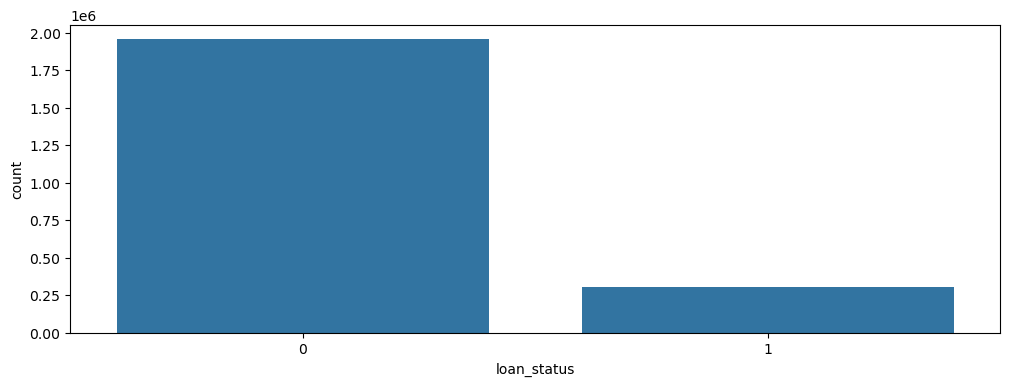

In [119]:
plt.figure(figsize=(12, 4))
sns.countplot(x="loan_status",data=df_cleaned)

C:\Users\goura\AppData\Local\Temp\ipykernel_15468\3044012447.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned["loan_amnt"],kde=False,bins=40)


<Axes: xlabel='loan_amnt'>

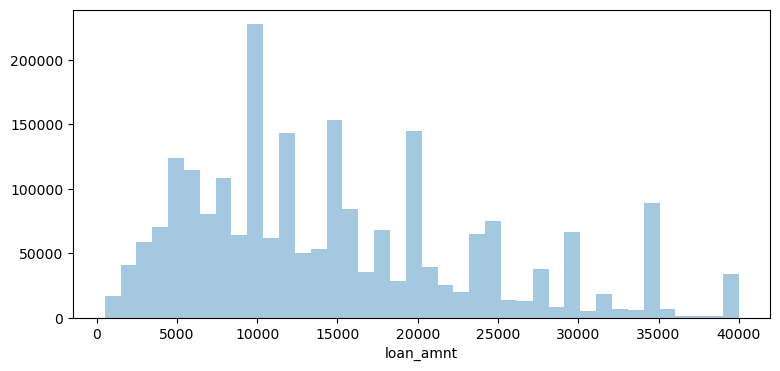

In [120]:
plt.figure(figsize=(9,4))
sns.distplot(df_cleaned["loan_amnt"],kde=False,bins=40)

In [121]:
sns.scatterplot(x="installment",y="loan_amnt",data=df_cleaned)

ValueError: Could not interpret value `installment` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

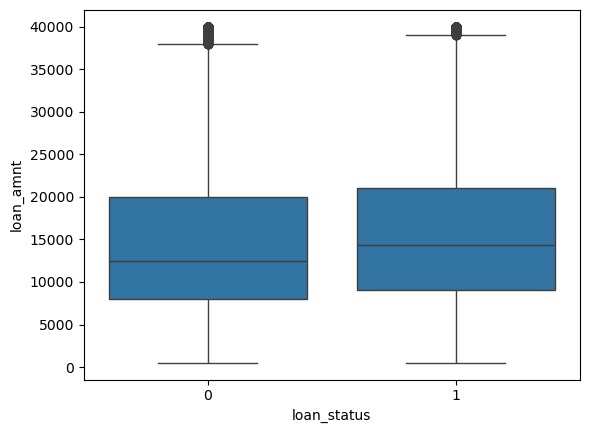

In [124]:
sns.boxplot(x="loan_status",y="loan_amnt",data=df_cleaned)

In [125]:
df_cleaned.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1956938.0,14941.192567,9224.130314,500.0,8000.0,12500.0,20000.0,40000.0
1,303584.0,15732.788536,8937.892541,500.0,9000.0,14400.0,21000.0,40000.0


<Axes: xlabel='grade', ylabel='count'>

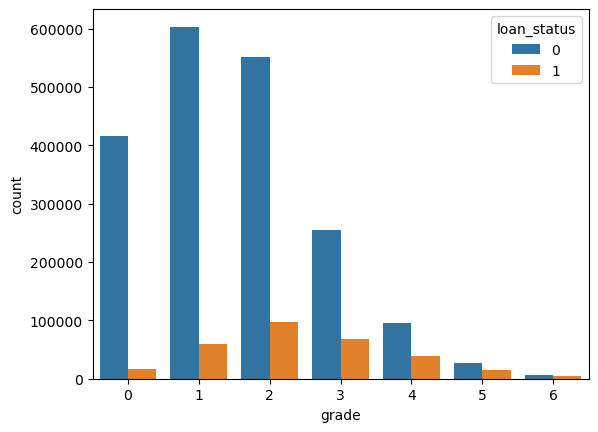

In [126]:
sns.countplot(x="grade",hue="loan_status",data=df_cleaned)

<Axes: xlabel='sub_grade', ylabel='count'>

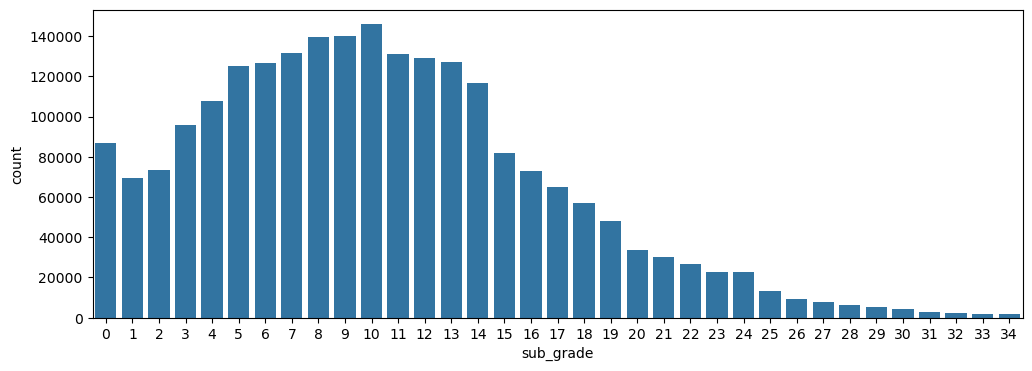

In [127]:
plt.figure(figsize=(12,4))
sub_order=sorted(df_cleaned["sub_grade"].unique())
sns.countplot(x='sub_grade',data=df_cleaned,order=sub_order)

<Axes: >

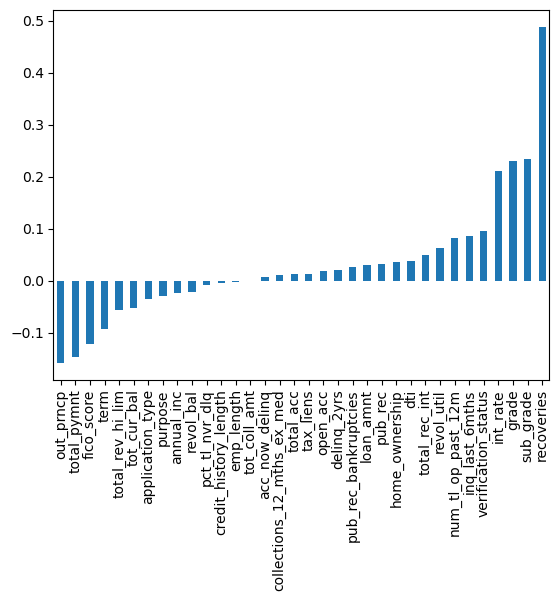

In [128]:
df_cleaned.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

<Axes: xlabel='verification_status', ylabel='count'>

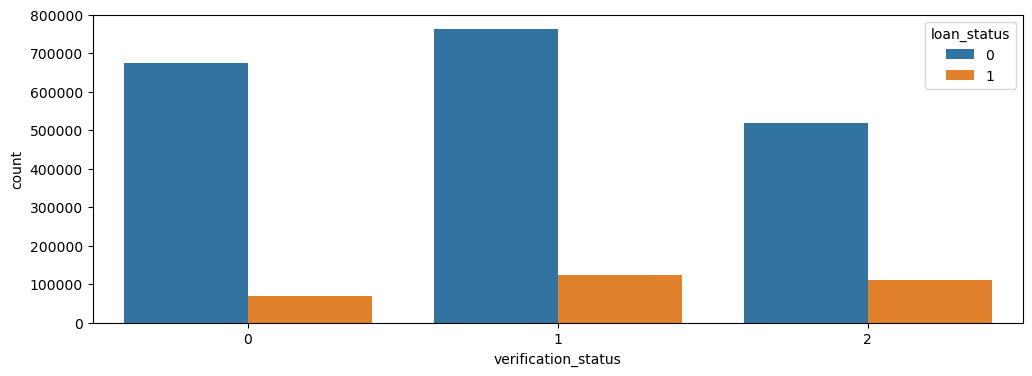

In [129]:
plt.figure(figsize=(12,4))
sns.countplot(x="verification_status",data=df_cleaned,hue="loan_status")

In [130]:
data=df_cleaned.sample(frac=.5,random_state=101)

In [131]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Separate the feature set (X) and the target/label (y)
X = df_cleaned.drop(columns=['loan_status'])  # Drop 'loan_status' from the feature set
y = df_cleaned['loan_status']  # 'loan_status' as the target

# Perform train-test split (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1808417, 34)
X_test shape: (452105, 34)
y_train shape: (1808417,)
y_test shape: (452105,)


In [132]:
corr_matrix = df_cleaned.corr().abs()

# Identify pairs with high correlation (above 0.8)
high_corr_pairs = np.where(corr_matrix > 0.8)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('int_rate', 'grade'), ('int_rate', 'sub_grade'), ('grade', 'sub_grade')]


In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)
scaler = MinMaxScaler()

# Fit the scaler only on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping

In [138]:
#running model
#creating model 
model = Sequential()

#adding layer
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

#parameters for early stopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [146]:
model.fit(x=X_train_scaled,y=y_train,epochs=25,batch_size=64,validation_data=(X_test_scaled,y_test),callbacks=[early_stop])

Epoch 1/25
28257/28257 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 0.3953 - val_loss: 0.3939
Epoch 2/25
28257/28257 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 0.3940 - val_loss: 0.3939
Epoch 3/25
28257/28257 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 0.3939 - val_loss: 0.3939
Epoch 4/25
28257/28257 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 0.3946 - val_loss: 0.3939
Epoch 5/25
28257/28257 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 0.3952 - val_loss: 0.3940
Epoch 5: early stopping


<Axes: >

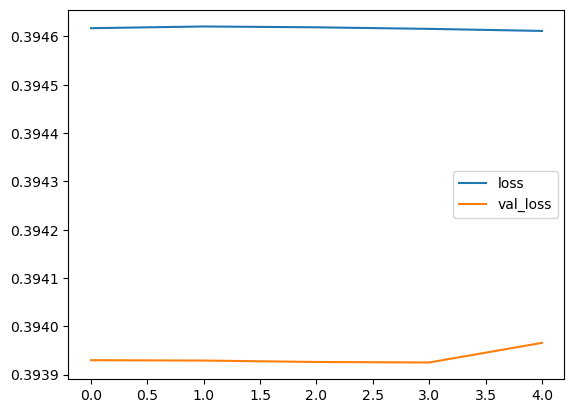

In [147]:
loss=pd.DataFrame(model.history.history)

loss.plot()

14129/14129 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step


C:\Users\goura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93    391522
           1       0.00      0.00      0.00     60583

    accuracy                           0.87    452105
   macro avg       0.43      0.50      0.46    452105
weighted avg       0.75      0.87      0.80    452105

Confusion Matrix:
 [[391522      0]
 [ 60583      0]]
AUC: 0.5


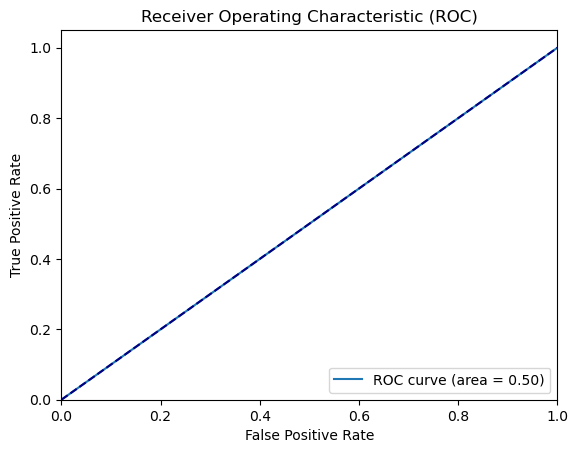

In [148]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

# Assuming this is a binary classifier and predict() gives probabilities
predict_prob = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1) using threshold of 0.5
predict = (predict_prob >= 0.5).astype(int)

# Now pass the binary predictions to the classification metrics
print(classification_report(y_test, predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Optionally, plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# # Ensure the true labels are binary (0 and 1)
# print("Unique values in y_test:", np.unique(y_test))

# # If needed, convert labels to binary (0 or 1)
# # For example, if your labels are [0, 2] or [1, 2], you can map them:
# y_test = y_test.replace({2: 1})  # If 2 is used to indicate class 1


In [ ]:
# # Assuming model.predict() returns probabilities for binary classification
# predict_prob = model.predict(X_test)

# # Convert probabilities to binary class labels (0 or 1)
# predict = (predict_prob >= 0.5).astype(int)

# # Now you can use the classification metrics
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# print(classification_report(y_test, predict))
# # print("Confusion Matrix:\n", confusion_matrix(y_test, predict))

# # ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
# roc_auc = roc_auc_score(y_test, predict_prob)
# print("AUC:", roc_auc)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
# X = df_cleaned.drop(columns=['loan_status'])  # Features
# y = df_cleaned['loan_status']  # Binary target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

In [ ]:
df_cleaned['loan_status']

In [ ]:
df_cleaned['loan_status'].isnull().sum()

In [ ]:
X